# **VesselBoost Toolbox**
## Module 2 - Test Time Adaptation
VesselBoost provides a Test Time Adaptation module for further optimization of a pre-trained model.

### Pre-trained models
We currently provide 3 pre-trained models (manual, om1, and om2) on Open Science Framework, which you can easily download by running the following cell:


In [1]:
!mkdir -p ./../saved_models/
!osf -p abk4p fetch /pretrained_models/manual_0429 ./../saved_models/manual_0429
# !osf -p abk4p fetch /pretrained_models/omelette1_0429 ./../saved_models/omelette1_0429
# !osf -p abk4p fetch /pretrained_models/omelette2_0429 ./../saved_models/omelette2_0429

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 64.7Mbytes/s]


To illustrate the usage of our toolbox, we will download a public MRA dataset next:

In [2]:
# Download the data
!mkdir -p ./../data/img/
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/withSkull/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii ./../data/img/GRE_400um.nii

100%|█████████████████████████████████████| 164M/164M [00:01<00:00, 156Mbytes/s]


### TTA without provided proxies 
You can use this module directly with your data, with and without a proxy segmentation. If a proxy segmentation is not provided, this module will automatically generate proxies with our pre-trained model, which are then used for TTA. Similar to *predict* module, there are four distinct settings for data preprocessing:
 - Set prep_mode to 1 for N4 bias field correction only;
 - Set prep_mode to 2 for denoising only;
 - Set prep_mode to 3 for both.;
 - Set prep_mode to 0 for no preprocessing.

If preprocessing is required, please explicitly pass a path to store the preprocessed images to **--ps_path** argument -- for more details, please refer to *Module_Prediction* notebook.
Below we illustrate the usage of this module with a sample MRA image and without preprocessing.

In [9]:
!mkdir -p ./../saved_imgs/generated_tta_label/
!python ./../test_time_adaptation.py \
    --image_path "./../data/img/" \
    --output_path "./../saved_imgs/generated_tta_label/" \
    --pretrained "./../saved_models/manual_0429" \
    --prep_mode 4 \
    --epochs 10 \
    --learning_rate 1e-3

2026-02-23 17:32:30,577 - INFO - TTA session will start shortly..
2026-02-23 17:32:30,577 - INFO - Parameters Info:
2026-02-23 17:32:30,577 - INFO - *************************************************************
2026-02-23 17:32:30,577 - INFO - Input image path: ./../data/img/, Preprocessed path: ./../data/img/, Output path: ./../saved_imgs/generated_tta_label/, Prep_mode: 4
2026-02-23 17:32:30,577 - INFO - Proxy path: ./../saved_imgs/generated_tta_label/proxies/, Output model path: ./../saved_imgs/generated_tta_label/finetuned/
2026-02-23 17:32:30,577 - INFO - Epoch number: 10, Learning rate: 0.001
2026-02-23 17:32:30,577 - INFO - Preprocessing aborted by user
2026-02-23 17:32:30,687 - INFO - Trainer initialized on device: cuda
2026-02-23 17:32:30,689 - INFO - Processing 1 images for test-time adaptation
2026-02-23 17:32:30,689 - INFO - Processing: GRE_400um.nii
2026-02-23 17:32:30,689 - INFO - Found proxy file, starting fine-tuning...
2026-02-23 17:32:31,317 - INFO - Initialized loade

The maximum intensity projection image of the generated segmentation can be seen below:

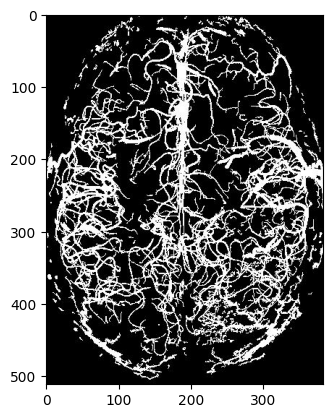

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../saved_imgs/generated_tta_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

### TTA with provided proxies

Alternatevely, you can provide a proxy segmentation to be used for test time adaption. This segmentation can be created using any method, including manual segmentation or other, non-deep-learning methods. Note that the segmentation file name has to be the same as the raw image, but in a different location.\
This usage case is illustrated below:

In [11]:
!mkdir -p ./../saved_imgs/generated_tta_label_3/ 
!python ./../test_time_adaptation.py \
    --image_path "./../data/img/" \
    --proxy_path "./../saved_imgs/generated_tta_label/proxies/" \
    --output_path "./../saved_imgs/generated_tta_label_3/" \
    --pretrained "./../saved_models/manual_0429" \
    --prep_mode 4 \
    --epochs 10 \
    --learning_rate 1e-3 

2026-02-23 17:33:29,665 - INFO - ./../saved_imgs/generated_tta_label_3/finetuned/ does not exist.
2026-02-23 17:33:29,665 - INFO - ./../saved_imgs/generated_tta_label_3/finetuned/ has been created!
2026-02-23 17:33:29,665 - INFO - TTA session will start shortly..
2026-02-23 17:33:29,665 - INFO - Parameters Info:
2026-02-23 17:33:29,665 - INFO - *************************************************************
2026-02-23 17:33:29,665 - INFO - Input image path: ./../data/img/, Preprocessed path: ./../data/img/, Output path: ./../saved_imgs/generated_tta_label_3/, Prep_mode: 4
2026-02-23 17:33:29,665 - INFO - Proxy path: ./../saved_imgs/generated_tta_label/proxies/, Output model path: ./../saved_imgs/generated_tta_label_3/finetuned/
2026-02-23 17:33:29,665 - INFO - Epoch number: 10, Learning rate: 0.001
2026-02-23 17:33:29,665 - INFO - Preprocessing aborted by user
2026-02-23 17:33:29,775 - INFO - Trainer initialized on device: cuda
2026-02-23 17:33:29,777 - INFO - Processing 1 images for tes

And here is the MIP image:

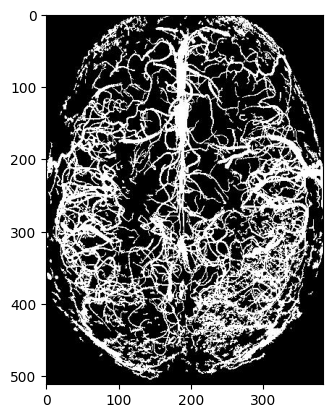

In [12]:
mip_image = img.imread("./../saved_imgs/generated_tta_label_3/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')